In [1]:
from OpInf import *
import numpy as np
import scipy
import umap
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
from matplotlib.colors import Normalize
from itertools import product, combinations

from sklearn.manifold import SpectralEmbedding

from pathlib import Path
import json
import stiefel

import importlib
importlib.reload(stiefel)

from scipy.io import loadmat
from operators import ckron, ckron_indices

import scienceplots
plt.style.use(["science", "no-latex", "grid"])

# set numpy random seed
np.random.seed(3)


check syl solve
True
here
True
6.656016016369184e-14
Use algebraic Stiefel log, metric alpha =  -0.0
dist 3.76991118430776
NORM TEST1: 0.0
NORM TEST2: 4.4874000348915644e-13
NORM TEST3: 6.907235200470652e-15


In [2]:
def initial_condition(mu, coord):
    if coord <= 0.5:
        return mu * np.sin(2 * np.pi * coord)
    
    return 0

In [3]:
from Representation import *

In [4]:
# mus = [1.1, 1.05, 1, 0.95, 0.9]
# mus = [1.15, 1.1, 1.05, 1, 0.95, 0.9, 0.85]
# mus = [0.4, 0.6, 0.8, 1.0, 1.2]
mus = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]
# Load data
T_end_train = 2 
dt= 1e-3
Train_T = int(T_end_train/dt)

# X_all_nominal = np.load("../examples/burgers/burgersFEniCSx_u_sol_all_RE1000.npy")[:, :Train_T+1, :]
# X_all_nominal = np.load("../examples/burgers/burgersFEniCSx_u_sol_all_RE1000_mu1.15_0.85.npy")[:, :Train_T+1, :]
# X_all_nominal = np.load("../examples/burgers/burgersFEniCSx_u_sol_all_RE1000_mu04_12.npy")[:, :Train_T+1, :]
X_all_nominal = np.load("../examples/burgers/burgersFEniCSx_u_sol_all_RE1000_mu0.4_0.1_1.2.npy")[:, :Train_T+1, :]
X_all_test = np.load("../examples/burgers/burgersFEniCSx_u_sol_RE1000_mu0.98.npy")[0]

In [5]:
p = 2
Mp = len(mus)
dt = 1e-3
T_end = 2

config = {
    "N": 2**7 + 1 + 1,
    "dt": 1e-3,
    "T_end": T_end,
    "mus": list(mus),
    "Mp": Mp,
    "K": T_end / dt,  # T_end / dt
    "DS": 1,
    "params": {
        "modelform": "LQCP",
        "modeltime": "continuous",
        "dt": dt,
        "ddt_order": "4c",
        "p": p, # polynomial order
        "lambda1": 5e-2,
        "lambda2": 5e-2,
        "lambda3": 100,
    },
    "type": "single"
}




In [6]:
np.random.randint(2, 5)

4

In [7]:
mus

[0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]

In [8]:
mus[1:-1]

[0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1]

In [9]:
list(combinations(mus[1:-1], 1))

[(0.5,), (0.6,), (0.7,), (0.8,), (0.9,), (1.0,), (1.1,)]

In [10]:
# # a colors list to tag the group of combinations
# colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# # Create a dictionary to store combinations with their respective colors
# tagged_combinations = {}

# for r in range(len(mus), 2, -1):
#     combinations_ = list(combinations(mus, r))
#     print(f"{len(combinations_)} of combinations generated: ", combinations_)
    
#     # Ensure that there are enough colors, cycle through colors if necessary
#     color = colors[(len(mus) - r) % len(colors)]
    
#     # Store the combinations with their tag
#     tagged_combinations[color] = combinations_
    
# # Flatten the list and maintain the color tagging
# flattened_tagged_combinations = [(item, color) for color, combos in tagged_combinations.items() for item in combos]

# # Example of accessing the flattened list with color tags
# for combo, color in flattened_tagged_combinations:
#     print(f"Combination: {combo}, Color: {color}")


# a colors list to tag the group of combinations
colors = plt.get_cmap('tab20').colors

# Create a dictionary to store combinations with their respective colors
tagged_combinations = {}

for r in range(1, len(mus) - 1):
    combinations_ = list(combinations(mus[1:-1], r))
    combinations_ = [(mus[0],) + combo + (mus[-1],) for combo in combinations_]
    print(f"{len(combinations_)} of combinations generated: ", combinations_)
    
    # Ensure that there are enough colors, cycle through colors if necessary
    color = colors[(r - 1) % len(colors)]
    
    # Store the combinations with their tag
    tagged_combinations[color] = combinations_
    
# Flatten the list and maintain the color tagging
flattened_tagged_combinations = [(item, color) for color, combos in tagged_combinations.items() for item in combos]

# Example of accessing the flattened list with color tags
for combo, color in flattened_tagged_combinations:
    print(f"Combination: {combo}, Color: {color}")

7 of combinations generated:  [(0.4, 0.5, 1.2), (0.4, 0.6, 1.2), (0.4, 0.7, 1.2), (0.4, 0.8, 1.2), (0.4, 0.9, 1.2), (0.4, 1.0, 1.2), (0.4, 1.1, 1.2)]
21 of combinations generated:  [(0.4, 0.5, 0.6, 1.2), (0.4, 0.5, 0.7, 1.2), (0.4, 0.5, 0.8, 1.2), (0.4, 0.5, 0.9, 1.2), (0.4, 0.5, 1.0, 1.2), (0.4, 0.5, 1.1, 1.2), (0.4, 0.6, 0.7, 1.2), (0.4, 0.6, 0.8, 1.2), (0.4, 0.6, 0.9, 1.2), (0.4, 0.6, 1.0, 1.2), (0.4, 0.6, 1.1, 1.2), (0.4, 0.7, 0.8, 1.2), (0.4, 0.7, 0.9, 1.2), (0.4, 0.7, 1.0, 1.2), (0.4, 0.7, 1.1, 1.2), (0.4, 0.8, 0.9, 1.2), (0.4, 0.8, 1.0, 1.2), (0.4, 0.8, 1.1, 1.2), (0.4, 0.9, 1.0, 1.2), (0.4, 0.9, 1.1, 1.2), (0.4, 1.0, 1.1, 1.2)]
35 of combinations generated:  [(0.4, 0.5, 0.6, 0.7, 1.2), (0.4, 0.5, 0.6, 0.8, 1.2), (0.4, 0.5, 0.6, 0.9, 1.2), (0.4, 0.5, 0.6, 1.0, 1.2), (0.4, 0.5, 0.6, 1.1, 1.2), (0.4, 0.5, 0.7, 0.8, 1.2), (0.4, 0.5, 0.7, 0.9, 1.2), (0.4, 0.5, 0.7, 1.0, 1.2), (0.4, 0.5, 0.7, 1.1, 1.2), (0.4, 0.5, 0.8, 0.9, 1.2), (0.4, 0.5, 0.8, 1.0, 1.2), (0.4, 0.5, 0.8, 1.1, 1.2), 

[0, 1, 8]
[0, 2, 8]
[0, 3, 8]
[0, 4, 8]
[0, 5, 8]
[0, 6, 8]
[0, 7, 8]
[0, 1, 2, 8]
[0, 1, 3, 8]
[0, 1, 4, 8]
[0, 1, 5, 8]
[0, 1, 6, 8]
[0, 1, 7, 8]
[0, 2, 3, 8]
[0, 2, 4, 8]
[0, 2, 5, 8]
[0, 2, 6, 8]
[0, 2, 7, 8]
[0, 3, 4, 8]
[0, 3, 5, 8]
[0, 3, 6, 8]
[0, 3, 7, 8]
[0, 4, 5, 8]
[0, 4, 6, 8]
[0, 4, 7, 8]
[0, 5, 6, 8]
[0, 5, 7, 8]
[0, 6, 7, 8]
[0, 1, 2, 3, 8]
[0, 1, 2, 4, 8]
[0, 1, 2, 5, 8]
[0, 1, 2, 6, 8]
[0, 1, 2, 7, 8]
[0, 1, 3, 4, 8]
[0, 1, 3, 5, 8]
[0, 1, 3, 6, 8]
[0, 1, 3, 7, 8]
[0, 1, 4, 5, 8]
[0, 1, 4, 6, 8]
[0, 1, 4, 7, 8]
[0, 1, 5, 6, 8]
[0, 1, 5, 7, 8]
[0, 1, 6, 7, 8]
[0, 2, 3, 4, 8]
[0, 2, 3, 5, 8]
[0, 2, 3, 6, 8]
[0, 2, 3, 7, 8]
[0, 2, 4, 5, 8]
[0, 2, 4, 6, 8]
[0, 2, 4, 7, 8]
[0, 2, 5, 6, 8]
[0, 2, 5, 7, 8]
[0, 2, 6, 7, 8]
[0, 3, 4, 5, 8]
[0, 3, 4, 6, 8]
[0, 3, 4, 7, 8]
[0, 3, 5, 6, 8]
[0, 3, 5, 7, 8]
[0, 3, 6, 7, 8]
[0, 4, 5, 6, 8]
[0, 4, 5, 7, 8]
[0, 4, 6, 7, 8]
[0, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 8]
[0, 1, 2, 3, 5, 8]
[0, 1, 2, 3, 6, 8]
[0, 1, 2, 3, 7, 8]
[0, 1, 2, 4, 5, 8]
[0

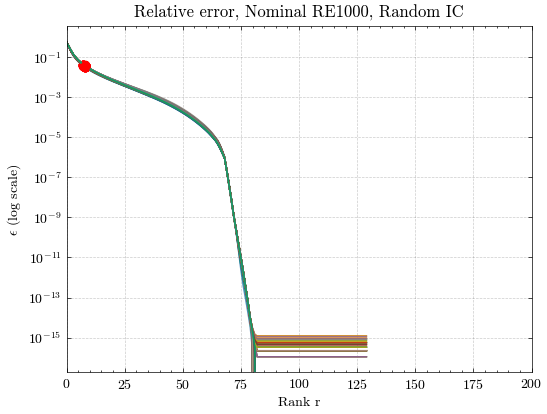

In [11]:
X_nominal = np.concatenate([X for X in X_all_nominal], axis=0).T

# randomly draw 3 ICs (mus) without replacement from X_all_nominal
# X_all_nominals_lst = [X_all_nominal, X_all_nominal_2]
X_list = []
drawn_mus = [tup[0] for tup in flattened_tagged_combinations]
color_tags = []
for n_X in range(len(flattened_tagged_combinations)):
    mus_idx = [mus.index(mus_) for mus_ in flattened_tagged_combinations[n_X][0]]
    print(mus_idx)
    color_tags.append(flattened_tagged_combinations[n_X][1])
    X_list.append(np.concatenate([X_all_nominal[i] for i in mus_idx], axis=0).T)

X_list.append(X_nominal)
color_tags.append((0,1,1)) # cyan

rob_lst = []
rel_err_SVD_lst = []
idx_lst = []
# names = [f"tap={taps}" for taps in numtaps] + ["Nominal"]
names = [f"mu={mus}" for mus in drawn_mus] + ["Nominal"]

fig, ax = plt.subplots(figsize=(6, 4.5))

err_tol = 5e-2
# err_tol = 1e-1

# mus = [0.01] # only one mu for now

for i in range(len(X_list)):
    
    X = X_list[i]
    
    # X_ref is the reference state which is just defined as the mean of the snapshots 
    X_ref = np.mean(X, axis=1)[:, None]
    
    print("X = ", X.shape)
    print("X_ref = ", X_ref.shape)
    
    # svd
    U, S, V = np.linalg.svd((X - X_ref), full_matrices=False)
    print("S = ", S[:5])
    eigvals_SVD = S**2 * (1 / (len(S) - 1))
    # print("eigvals_SVD = \n", eigvals_SVD[:5])
    # append U
    # print("U = ", U.shape)
    rob_lst.append(U)
    
    # calculate the relative error
    rel_err_SVD = 1 - (np.cumsum(eigvals_SVD) / np.sum(eigvals_SVD))
    rel_err_SVD_lst.append(rel_err_SVD)
    # print("rel_err_SVD = \n", rel_err_SVD[:4])

    # print the first idx when it is less than 1e-4
    idx = np.where(rel_err_SVD < err_tol)[0][0] + 1
    idx_lst.append(idx)
    print("idx = ", idx)
    print("rel_err_SVD[idx] = ", rel_err_SVD[idx])
    
    ax.plot(rel_err_SVD_lst[i], label=names[i], linestyle='-', alpha=0.7)
    ax.plot(idx, rel_err_SVD[idx], 'ro', label=f"{err_tol:.2e} at r={idx}, {names[i]}")
    ax.set_yscale('log')
    ax.set_ylabel("$\epsilon$ (log scale)")
    # set limit
    ax.set_xlim([0, 200])
    # ax.set_ylim([1e-13, 1e-3])
    # show grid
    ax.grid(True, alpha=0.2)
    ax.set_xlabel("Rank r")
    ax.set_title("Relative error, Nominal RE1000, Random IC")
    # ax.legend()

In [12]:
# Model parameters
# r = np.max(idx_lst)
r = idx_lst[-1]
# q_trunc = 2
q_trunc = 12
# p = 3

tol = 1e-3      # tolerence for alternating minimization
gamma = 0.01       # regularization parameter
max_iter = 100  # maximum number of iterations

Vr_lst = []
Vbar_lst = []
Shat_lst = []
Xi_lst = []
Poly_lst = []

for i in range(len(X_list)):
    # Procustes problem for each mu
    X = X_list[i]
    num_snapshots = X.shape[1]
    print("num_snapshots: ", num_snapshots)
    print("X = ", X.shape)
    X_ref = np.mean(X, axis=1)[:, None]
    # X_ref = np.zeros((X.shape[0]))[:, None]
    X_centered = X - X_ref

    U, S, Vr = np.linalg.svd(X_centered, full_matrices=False)
    
    Vr = U[:, :r]
    Vbar = U[:, r:r + q_trunc]
    q = Vr.T @ X_centered
    Proj_error = X_centered - (Vr @ q)
    Poly = np.concatenate(polynomial_form(q, p), axis=0)
    Xi = Vbar.T @ Proj_error @ Poly.T @ np.linalg.inv(Poly @ Poly.T + gamma * np.identity((p - 1)*r))
    
    energy = np.linalg.norm(Vr @ q + (Vbar @ Xi @ Poly), 'fro')**2 / np.linalg.norm(X - X_ref, 'fro')**2
    
    print(f"Snapshot energy: {energy:e}")

    Gamma_MPOD = X_ref + (Vr @ q) + (Vbar @ Xi @ Poly)
    print(f"\nReconstruction error: {relative_error(X, Gamma_MPOD, X_ref):.4%}")
    
    Vr_lst.append(Vr)
    Vbar_lst.append(Vbar)
    Shat_lst.append(q)
    Xi_lst.append(Xi)
    Poly_lst.append(Poly)

    # q, energy, Xi, Vr, Vbar, Poly = alternating_minimization(X, X_ref, num_snapshots, max_iter, 1e-3, gamma, r, q, p, initial_Shat=None)

    # print("q = ", q.shape)
    # print("qbar = ", qbar.shape)

num_snapshots:  6003
X =  (130, 6003)
Snapshot energy: 9.744064e-01

Reconstruction error: 15.9969%
num_snapshots:  6003
X =  (130, 6003)
Snapshot energy: 9.735716e-01

Reconstruction error: 16.2556%
num_snapshots:  6003
X =  (130, 6003)
Snapshot energy: 9.720723e-01

Reconstruction error: 16.7105%
num_snapshots:  6003
X =  (130, 6003)
Snapshot energy: 9.718780e-01

Reconstruction error: 16.7686%
num_snapshots:  6003
X =  (130, 6003)
Snapshot energy: 9.719722e-01

Reconstruction error: 16.7405%
num_snapshots:  6003
X =  (130, 6003)
Snapshot energy: 9.722138e-01

Reconstruction error: 16.6683%
num_snapshots:  6003
X =  (130, 6003)
Snapshot energy: 9.724967e-01

Reconstruction error: 16.5834%
num_snapshots:  8004
X =  (130, 8004)
Snapshot energy: 9.733293e-01

Reconstruction error: 16.3301%
num_snapshots:  8004
X =  (130, 8004)
Snapshot energy: 9.721046e-01

Reconstruction error: 16.7008%
num_snapshots:  8004
X =  (130, 8004)
Snapshot energy: 9.722038e-01

Reconstruction error: 16.6712%


In [1]:
# # Aligning the signs of Vr_lst with Vr_lst[-1]
# nominal_signs = np.sign(Vr_lst[-1])
# non_zero_signs_ind = nominal_signs != 0
# for i in range(len(Vr_lst) - 1):
#     max_inds = np.argmax(Vr_lst[-1], axis=0) # max indexes for each column corresponding to the largest value in each column
#     for j in range(Vr_lst[i].shape[1]):
#         if np.sign(Vr_lst[i][max_inds[j], j]) != np.sign(Vr_lst[-1][max_inds[j], j]):
#             Vr_lst[i][:, j] = -Vr_lst[i][:, j]

# # For Vbar_lst, ensuring sign agreement with Vbar_lst[-1] using np.copysign\
# for i in range(len(Vbar_lst)):
#     Vbar_lst[i] = np.copysign(Vbar_lst[i], Vbar_lst[-1])

# Aligning the signs of Vr_lst with Vr_lst[-1]
Vr1 = Vr_lst[-1]

for idx in range(len(Vr_lst) - 1):
    Vr_idx = Vr_lst[idx]
    for j in range(Vr_idx.shape[1]):
        dist1 = np.linalg.norm(Vr1[:, j] - Vr_idx[:, j])
        dist2 = np.linalg.norm(Vr1[:, j] + Vr_idx[:, j])
        if dist2 < dist1:
            Vr_lst[idx][:, j] = -Vr_lst[idx][:, j]

# For Vbar_lst, ensuring sign agreement with Vbar_lst[-1]
Vbar1 = Vbar_lst[-1]
for idx in range(len(Vbar_lst) - 1):
    Vbar_idx = Vbar_lst[idx]
    for j in range(Vbar_idx.shape[1]):
        dist1 = np.linalg.norm(Vbar1[:, j] - Vbar_idx[:, j])
        dist2 = np.linalg.norm(Vbar1[:, j] + Vbar_idx[:, j])
        if dist2 < dist1:
            Vbar_lst[idx][:, j] = -Vbar_lst[idx][:, j]


# plot first 3 modes of Vr and Vbar
n_modes_viz = 3
fig, axs = plt.subplots(2, n_modes_viz, figsize=(18, 8))
for i in range(n_modes_viz):
    for j in range(len(Vr_lst)):
        axs[0, i].plot(Vr_lst[j][:, i+3], label=names[j], color = 'grey', alpha=0.4)
        # axs[0, i].legend(fontsize='x-small')
    axs[0, i].set_title(f"Mode {i+3}")

for i in range(2):
    for j in range(len(Vbar_lst)):
        axs[1, i].plot(Vbar_lst[j][:, i], color='grey', alpha=0.4)
    axs[1, i].set_title(f"Mode {r + i}")

NameError: name 'Vr_lst' is not defined

In [14]:
V_combined_lst = []
for i in range(len(Vr_lst)):
    V_combined = np.concatenate([Vr_lst[i], Vbar_lst[i]], axis=1)
    # assert(np.allclose(V_combined[:, :r], Vr_lst[i]))
    # assert(np.allclose(V_combined[:, r:], Vbar_lst[i]))
    V_combined_lst.append(V_combined)

# plot spectral embedding of the generated stiefel sampels
flat_Vr_arr = np.concatenate([rob.flatten()[:, None] for rob in Vr_lst], axis=1)
flat_Vbar_arr = np.concatenate([rob.flatten()[:, None] for rob in Vbar_lst], axis=1)
flat_V_combined_arr = np.concatenate([rob.flatten()[:, None] for rob in V_combined_lst], axis=1)

# colors = 
colors = plt.cm.tab20c(np.linspace(0, 1, len(Vr_lst)))


# Perform spectral embedding
embedder = SpectralEmbedding(n_components=2)
embedding_Vr = embedder.fit_transform(flat_Vr_arr.T)
embedding_Vbar = embedder.fit_transform(flat_Vbar_arr.T)

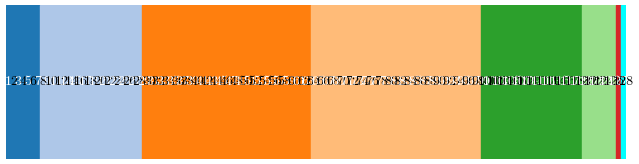

In [15]:
# Create a figure and a subplot
fig, ax = plt.subplots(figsize=(8, 2))  # Adjust the figure size as needed

# Loop through the colors and plot each one as a rectangle
for i, color in enumerate(color_tags):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))
    ax.text(i + 0.5, 0.5, str(i + 1), color='white' if i % 2 == 0 else 'black',
            horizontalalignment='center', verticalalignment='center')

# Set limits and remove axes for better visualization
ax.set_xlim(0, len(colors))
ax.set_ylim(0, 1)
ax.axis('off')

# Show the plot
plt.show()

In [16]:
# import adjustText

# texts = []

# # plot the spectral embedding with the color tags
# fig, ax = plt.subplots(figsize=(8, 6))
# for i in range(len(Vr_lst)):
#     ax.scatter(embedding_Vr[i, 0], embedding_Vr[i, 1], c=color_tags[i], label=names[i])
#     # ax.scatter(embedding_Vbar[i, 0], embedding_Vbar[i, 1], c=color_tags[i], marker='x')
#     # ax.annotate(names[i], (embedding_Vbar[i, 0], embedding_Vbar[i, 1]))

# # Get the furthest 3 points from the nominal point in the spectral embedding
# spectral_dist = np.linalg.norm(embedding_Vr - embedding_Vr[-1], axis=1)
# furthest_3 = np.argsort(spectral_dist)[-4:-1]

# # for i in range(len(furthest_3)):
#     # ax.annotate(names[furthest_3[i]], (embedding_Vr[furthest_3[i], 0], embedding_Vr[furthest_3[i], 1]))
#     # texts.append(ax.text(embedding_Vr[furthest_3[i], 0], embedding_Vr[furthest_3[i], 1], names[furthest_3[i]]))

# # adjust the texts
# # adjustText.adjust_text(texts, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

In [17]:
np.unique(color_tags, axis=0)

array([[0.        , 1.        , 1.        ],
       [0.12156863, 0.46666667, 0.70588235],
       [0.17254902, 0.62745098, 0.17254902],
       [0.59607843, 0.8745098 , 0.54117647],
       [0.68235294, 0.78039216, 0.90980392],
       [0.83921569, 0.15294118, 0.15686275],
       [1.        , 0.49803922, 0.05490196],
       [1.        , 0.73333333, 0.47058824]])

In [18]:
len(np.unique(color_tags, axis=0))

8

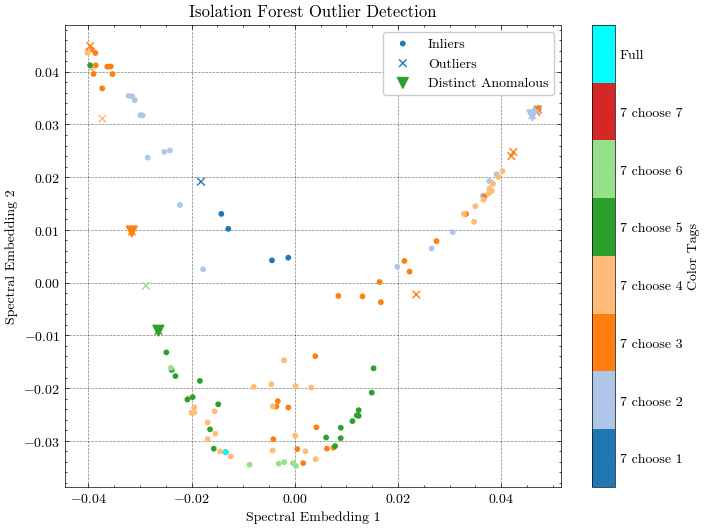

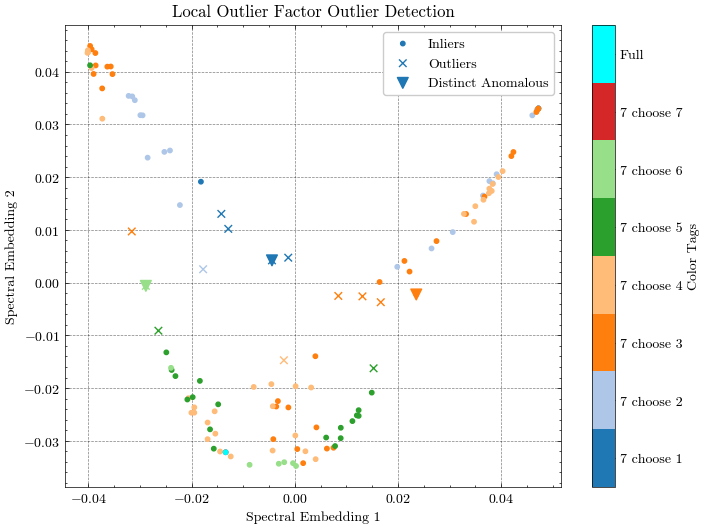

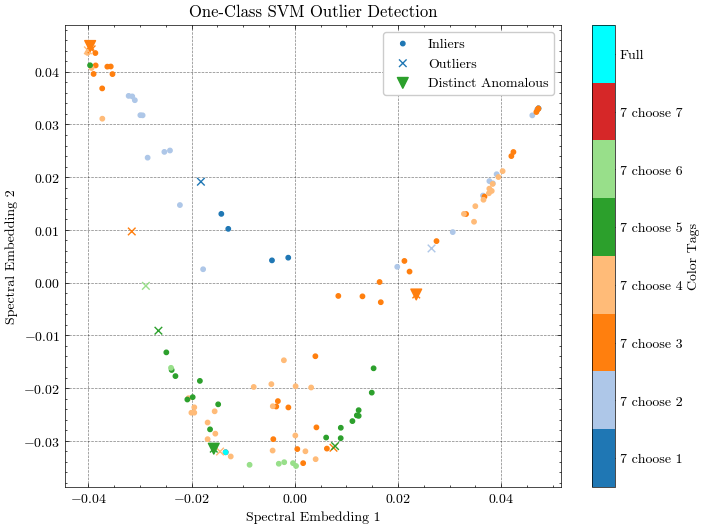

In [19]:
# reducer = umap.UMAP(n_components=2, random_state=42, set_op_mix_ratio=0.25)
# embedding = reducer.fit_transform(flat_V_combined_arr.T)
embedding = embedder.fit_transform(flat_V_combined_arr.T)
color_tags = np.array(color_tags)

# Outlier Detection
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(embedding)
iso_labels = iso_forest.predict(embedding)
iso_scores = iso_forest.decision_function(embedding)

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
lof_labels = lof.fit_predict(embedding)
lof_scores = lof.negative_outlier_factor_

oc_svm = OneClassSVM(nu=0.1)
oc_svm.fit(embedding)
svm_labels = oc_svm.predict(embedding)
svm_scores = oc_svm.decision_function(embedding)

# Clustering
n_clusters = 3  # Number of clusters to ensure distinct outliers
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(embedding)

# Find most anomalous point in each cluster
def get_distinct_outliers(scores, cluster_labels, n_clusters):
    distinct_outliers = []
    for cluster in range(n_clusters):
        cluster_indices = np.where(cluster_labels == cluster)[0]
        if len(cluster_indices) > 0:
            cluster_scores = scores[cluster_indices]
            most_anomalous_index = cluster_indices[np.argmin(cluster_scores)]
            distinct_outliers.append(most_anomalous_index)
    return distinct_outliers

anomalous_idx_iso = get_distinct_outliers(iso_scores, cluster_labels, n_clusters)
anomalous_idx_lof = get_distinct_outliers(lof_scores, cluster_labels, n_clusters)
anomalous_idx_svm = get_distinct_outliers(svm_scores, cluster_labels, n_clusters)

# Plotting
def plot_embedding(embedding, labels, anomalous_idx, title):
    inliers_idx = np.where(labels == 1)[0]
    outliers_idx = np.where(labels == -1)[0]
    inliers = embedding[inliers_idx]
    outliers = embedding[outliers_idx]
    
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(inliers[:, 0], inliers[:, 1], c=color_tags[inliers_idx], s=10, label='Inliers', marker='o')
    ax.scatter(outliers[:, 0], outliers[:, 1], c=color_tags[outliers_idx], s=30, label='Outliers', marker='x')
    ax.scatter(embedding[anomalous_idx, 0], embedding[anomalous_idx, 1], c=color_tags[anomalous_idx], s=60, label='Distinct Anomalous', marker='v')
    ax.set_title(title)
    ax.set_xlabel('Spectral Embedding 1')
    ax.set_ylabel('Spectral Embedding 2')
    ax.legend()
    
    # Create colorbar
    unique_color_tags = []
    unique_color_tags.append(color_tags[0])
    for i in range(1, len(color_tags)):
        is_unique = True
        for j in range(len(unique_color_tags)):
            if np.array_equal(color_tags[i], unique_color_tags[j]):
                is_unique = False
                break
        if is_unique:
            unique_color_tags.append(color_tags[i])
            
    number_of_colors = len(unique_color_tags)
    norm = Normalize(vmin=0, vmax=number_of_colors-1)
    sm = ScalarMappable(norm=norm, cmap=ListedColormap(unique_color_tags))
    sm.set_array([])
    
    cbar = plt.colorbar(sm, ticks=np.arange(number_of_colors), boundaries=np.arange(-0.5, number_of_colors+0.5, 1), ax=ax)
    cbar.set_label('Color Tags')
    cbar.set_ticks(np.arange(number_of_colors))
    
    # Cbar labels is len(mus) - 2 (excluding the first and last mus) choose r-1
    combo_names = [f"{len(mus) - 2} choose {number}" for number in range(1, len(mus) - 1)]
    cbar.set_ticklabels([f'{comboname}' for comboname in combo_names] + ['Full'])
    
    # cbar.set_ticklabels([f'Group {i+1}' for i in range(number_of_colors)])

    plt.show()

# Isolation Forest
plot_embedding(embedding, iso_labels, anomalous_idx_iso, 'Isolation Forest Outlier Detection')

# Local Outlier Factor
plot_embedding(embedding, lof_labels, anomalous_idx_lof, 'Local Outlier Factor Outlier Detection')

# One-Class SVM
plot_embedding(embedding, svm_labels, anomalous_idx_svm, 'One-Class SVM Outlier Detection')

In [20]:
import importlib
import OpInf
# import reloading
# reload the whole OpInf module
importlib.reload(OpInf)
from OpInf import *


config['robparams'] = {
    "r": int(r)
}

operators_lst = []

# use each mu in between the min and max mu
for i in range(len(X_list) - 1):
    # X = X_list[i]
    # num_snapshots = X.shape[1]
    # print("num_snapshots: ", num_snapshots)
    # print("X = ", X.shape)
    
    mu_test = mus[2]
    
    X = X_list[i]
    X_ref = np.mean(X, axis=1)[:, None]
    X_centered = X - X_ref

    # U, S, Vr = np.linalg.svd(X_centered, full_matrices=False)
    
    Vr = Vr_lst[i]
    Vbar = Vbar_lst[i]
    q = Vr.T @ X_centered

    Mp = len(drawn_mus[i])
    print("Mp: ", Mp)
    
    Nsnapshots = X.shape[1]
    print("Nsnapshots: ", Nsnapshots)
    
    dShatdt = []
    Shat_lst = []
    dSdt = []
    for j in range(Mp):
        start_ind = int((j) * Nsnapshots/Mp)
        end_ind = int((j+1) * Nsnapshots/Mp)
        print("start_ind: ", start_ind)
        print("end_ind: ", end_ind)
        ddtshat, ind = ddt(q[:, start_ind:end_ind], dt=dt, scheme='4c')
        ddts, ind = ddt(X[:, start_ind:end_ind], dt=dt, scheme="4c")
        dShatdt.append(ddtshat)
        ind = np.array(ind) + int((j) * Nsnapshots/Mp)
        Shat_lst.append(q[:, ind])
        dSdt.append(ddts)

    # update config file with truncation order r
    config['robparams'] = {
        "r": int(r)
    }

    Shat_py = np.concatenate(Shat_lst, axis=1)
    dShatdt_py = np.concatenate(dShatdt, axis=1).T
    dSdt_py = np.hstack(dSdt)

    print("Shape of Shat_py: ", Shat_py.shape)
    print("Shape of dShatdt_py: ", dShatdt_py.shape)


    N = int(config['N'])
    dt = config['dt']
    T_end = config['T_end']
    K = int(config['K'])
    DS = config['DS']
    params = config['params']  # This will be a dictionary in Python
    robparams = config['robparams']  # This will be a dictionary in Python


    coord = np.linspace(0, 1, N)
    print("coord = ", coord.shape)
    IC = np.array([initial_condition(mu_test, c) for c in coord])
    q0 = Vr.T @ (IC[:, None] - X_ref).flatten()
    time_domain = np.arange(0, T_end, dt)
    train_size = Shat_py.shape[1] // len(mus)
    
    print("Train size: ", train_size)

    Shat_true = Shat_lst[2]
    # regs_product = [1e-3, 1e1, 3, 1e1, 1e4, 10, 1e1, 1e7, 7]

    # regs_product = [10, 10, 1, 43.939705607607905, 43.939705607607905, 1, 27.825594022071257, 27.825594022071257, 1] # for r=5
    # regs_product = [1e-1, 1e-1, 1, 1, 1000, 5, 1000, 100000, 3]
    # regs_product = [1e-1, 1e-1, 1, 300, 300, 1, 100000, 100000, 1] # r =8, 5e-2
    regs_product = [1e-1, 1e-1, 1, 4000, 4000, 1, 1000000, 1000000, 1] # r =5, 1e-1
    # regs_product = [1e-1, 1e-1, 1, 1e-1, 1e-1, 1, 10000, 10000, 1]
    # regs_product = [10, 10, 1, 129.1549665014884, 129.1549665014884, 1, 1000000, 1000000, 1] # for r=12

    regs, errors = train_gridsearch(Shat_py, dShatdt_py, Shat_true, train_size, r, regs_product, time_domain, q0, params, testsize=None, margin=1.1)
    
    print(f"Regularization params: {regs}, \t Error: {errors}")
    
    params['lambda1'] = regs[0]
    params['lambda2'] = regs[1]
    if len(regs) > 2:
        params['lambda3'] = regs[2]

    operators = infer_operators_nl(Shat_py, None, config['params'], dShatdt_py)
    
    operators_lst.append(operators)


Mp:  3
Nsnapshots:  6003
start_ind:  0
end_ind:  2001
start_ind:  2001
end_ind:  4002
start_ind:  4002
end_ind:  6003
Shape of Shat_py:  (8, 5991)
Shape of dShatdt_py:  (5991, 8)
coord =  (130,)
Train size:  665
Constructing least-squares solver, r=8
TRAINING 1 ROMS
(1/1) Testing ROM with (0.09999999999999999, 4000.0000000000014, 1000000.0)
Generating ghat ...
drp:  100
Obtained data matrix...
Regularization parameters:  0.09999999999999999 4000.0000000000014 1000000.0
Solving...
Solved!
Integrating...
Bound check passed
Regularization params: [0.09999999999999999, 4000.0000000000014, 1000000.0], 	 Error: 0.9097988405463997
Generating ghat ...
drp:  100
Obtained data matrix...
Regularization parameters:  0.09999999999999999 4000.0000000000014 1000000.0
Solving...
Solved!
Mp:  3
Nsnapshots:  6003
start_ind:  0
end_ind:  2001
start_ind:  2001
end_ind:  4002
start_ind:  4002
end_ind:  6003
Shape of Shat_py:  (8, 5991)
Shape of dShatdt_py:  (5991, 8)
coord =  (130,)
Train size:  665
Constr

In [21]:
T_end_index = int(T_end/dt)

In [22]:
import tqdm

abs_error_full_lst_operators = []
relative_error_testing_window_lst_operators = []
relative_error_training_window_lst_operators = []
s_rec_full_lst_operators = []

mu_test = 0.98

for i in tqdm.tqdm(range(len(X_list)-1)):
    
    operators = operators_lst[i]
    
    X = X_list[i]
    X_ref = np.mean(X, axis=1)[:, None]
    # X_centered = X - X_ref
    
    Vr = Vr_lst[i]
    Vbar = Vbar_lst[i]
    
    coord = np.linspace(0, 1, N)
    # print("coord = ", coord.shape)
    IC = np.array([initial_condition(mu_test, c) for c in coord])
    q0 = Vr.T @ (IC[:, None] - X_ref).flatten()
    
    T_end_full = 8
    time_domain_full = np.arange(0, T_end_full, dt)
    
    train_size = Shat_py.shape[1]

    multi_indices = generate_multi_indices_efficient(len(q0), p=p)
    
    out_full = scipy.integrate.solve_ivp(
                rhs,  # Integrate this function
                [time_domain_full[0], time_domain_full[-1]],  # over this time interval
                q0,  # from this initial condition
                t_eval=time_domain_full,  # evaluated at these points
                args=[operators, config['params'], None, multi_indices],  # additional arguments to rhs
            )
    
    s_hat_full = out_full.y
    poly_full = np.concatenate(polynomial_form(s_hat_full, p=p), axis=0)
    # Xi = Xi_lst[-1] # the nominal Xi
    Xi = Xi_lst[i]
    # print("Poly shape: ", poly_full.shape)

    s_rec_full = X_ref + Vr @ s_hat_full + Vbar @ Xi @ poly_full
    
    
    abs_error_full = np.abs(X_all_test.T - s_rec_full)
    relative_error_testing_window = np.linalg.norm(X_all_test.T[:, T_end_index:] - s_rec_full[:, T_end_index:], 'fro') / np.linalg.norm(X_all_test.T[:, T_end_index:], 'fro')
    relative_error_training_window = np.linalg.norm(X_all_test.T[:, :T_end_index] - s_rec_full[:, :T_end_index], 'fro') / np.linalg.norm(X_all_test.T[:, :T_end_index], 'fro')
    
    abs_error_full_lst_operators.append(abs_error_full)
    relative_error_testing_window_lst_operators.append(relative_error_testing_window)
    relative_error_training_window_lst_operators.append(relative_error_training_window)
    s_rec_full_lst_operators.append(s_rec_full)
    
    

100%|██████████| 127/127 [00:02<00:00, 46.33it/s]


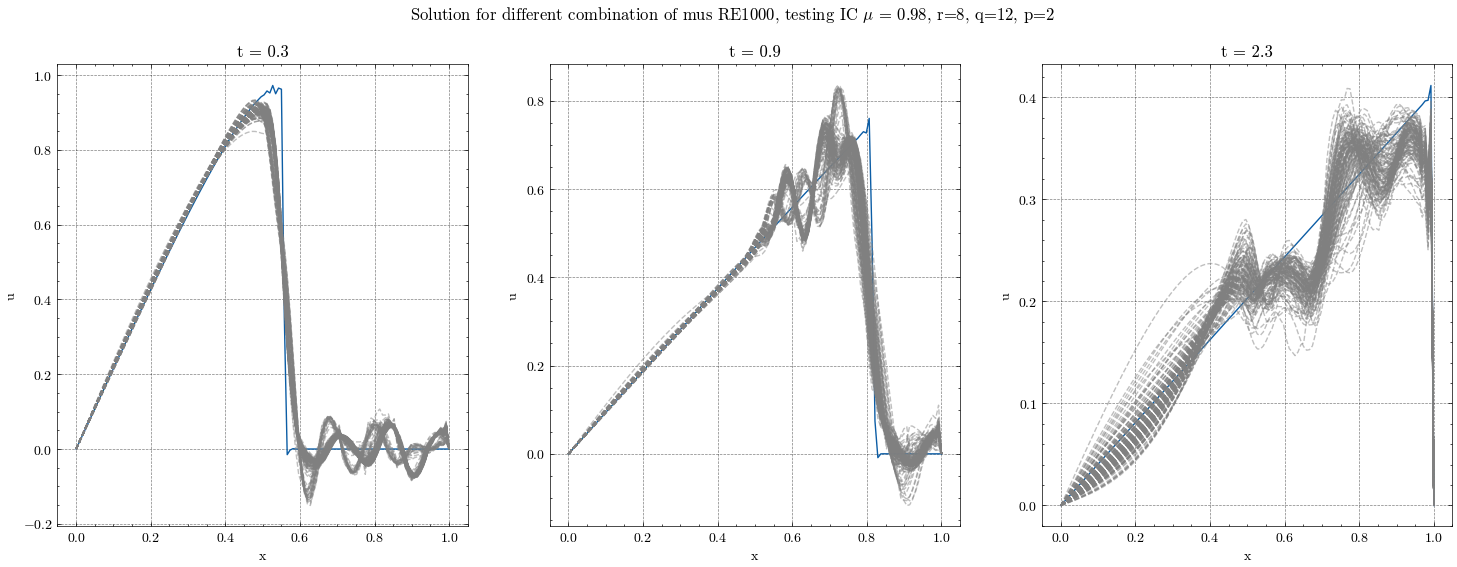

In [23]:
times = [0.3, 0.9, 2.3]

# Example setup (you'll need to define mean_s_rec_full, lower_bound, and upper_bound appropriately)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, t in enumerate(times):
    ax = axs[i]
    t_index = int(t / dt)  # Ensure dt is defined and properly calculated

    # Main plot
    x_values = np.linspace(0, 1, s_rec_full_lst_operators[0].shape[0])
    
    ax.plot(x_values, X_all_test.T[:, t_index], label="True", linestyle='-', alpha=1)
    for j in range(len(X_list)-1):
        ax.plot(x_values, s_rec_full_lst_operators[j][:, t_index], label=names[j], linestyle='--', alpha=0.5, color='grey')
    
    ax.set_title(f"t = {t}")
    ax.set_xlabel('x')
    ax.set_ylabel('u')
    # ax.legend(loc="upper left")

    
plt.suptitle(f"Solution for different combination of mus RE1000, testing IC $\mu$ = 0.98, r={r}, q={q_trunc}, p={p}")
plt.show()


In [24]:
X_list[0].shape

(130, 6003)

In [25]:
# choose the distinct anomalous points from one-class SVM for stochastic modeling
V_combined_lst_stochastic = []
Vr_lst_sel = []
Vbar_lst_sel = []

for i in anomalous_idx_svm:
    assert(np.allclose(V_combined_lst[i][:, :r], Vr_lst[i]))
    assert(np.allclose(V_combined_lst[i][:, r:], Vbar_lst[i]))
    V_combined_lst_stochastic.append(V_combined_lst[i])
    Vr_lst_sel.append(Vr_lst[i])
    Vbar_lst_sel.append(Vbar_lst[i])    

X_all_global = np.concatenate([X_list[i] for i in anomalous_idx_svm], axis=1)
X_all_global = X_all_global - np.mean(X_all_global, axis=1)[:, None]
V_combined_global = np.linalg.svd(X_all_global, full_matrices=False)[0][:, :r+q_trunc]
V_combined_lst_stochastic.append(V_combined_global)
Vr_lst_sel.append(V_combined_global[:, :r])
Vbar_lst_sel.append(V_combined_global[:, r:])

In [26]:
# now align the signs of Vr_lst_sel with Vr_lst_sel[-1]
Vr1 = Vr_lst_sel[-1]

for idx in range(len(Vr_lst_sel) - 1):
    Vr_idx = Vr_lst_sel[idx]
    for j in range(Vr_idx.shape[1]):
        dist1 = np.linalg.norm(Vr1[:, j] - Vr_idx[:, j])
        dist2 = np.linalg.norm(Vr1[:, j] + Vr_idx[:, j])
        if dist2 < dist1:
            Vr_lst_sel[idx][:, j] = -Vr_lst_sel[idx][:, j]

# Aligning the signs of Vr_lst_sel with Vr_lst_sel[-1]
Vbar1 = Vbar_lst_sel[-1]

for idx in range(len(Vbar_lst_sel) - 1):
    Vbar_idx = Vbar_lst_sel[idx]
    for j in range(Vbar_idx.shape[1]):
        dist1 = np.linalg.norm(Vbar1[:, j] - Vbar_idx[:, j])
        dist2 = np.linalg.norm(Vbar1[:, j] + Vbar_idx[:, j])
        if dist2 < dist1:
            Vbar_lst_sel[idx][:, j] = -Vbar_lst_sel[idx][:, j]

# Aligning signs for V_combined_lst_stochastic
V_combined1 = V_combined_lst_stochastic[-1]

for idx in range(len(V_combined_lst_stochastic) - 1):
    V_combined_idx = V_combined_lst_stochastic[idx]
    for j in range(V_combined_idx.shape[1]):
        dist1 = np.linalg.norm(V_combined1[:, j] - V_combined_idx[:, j])
        dist2 = np.linalg.norm(V_combined1[:, j] + V_combined_idx[:, j])
        if dist2 < dist1:
            V_combined_lst_stochastic[idx][:, j] = -V_combined_lst_stochastic[idx][:, j]
            
assert(np.allclose(V_combined_lst_stochastic[0][:, :r], Vr_lst_sel[0]))

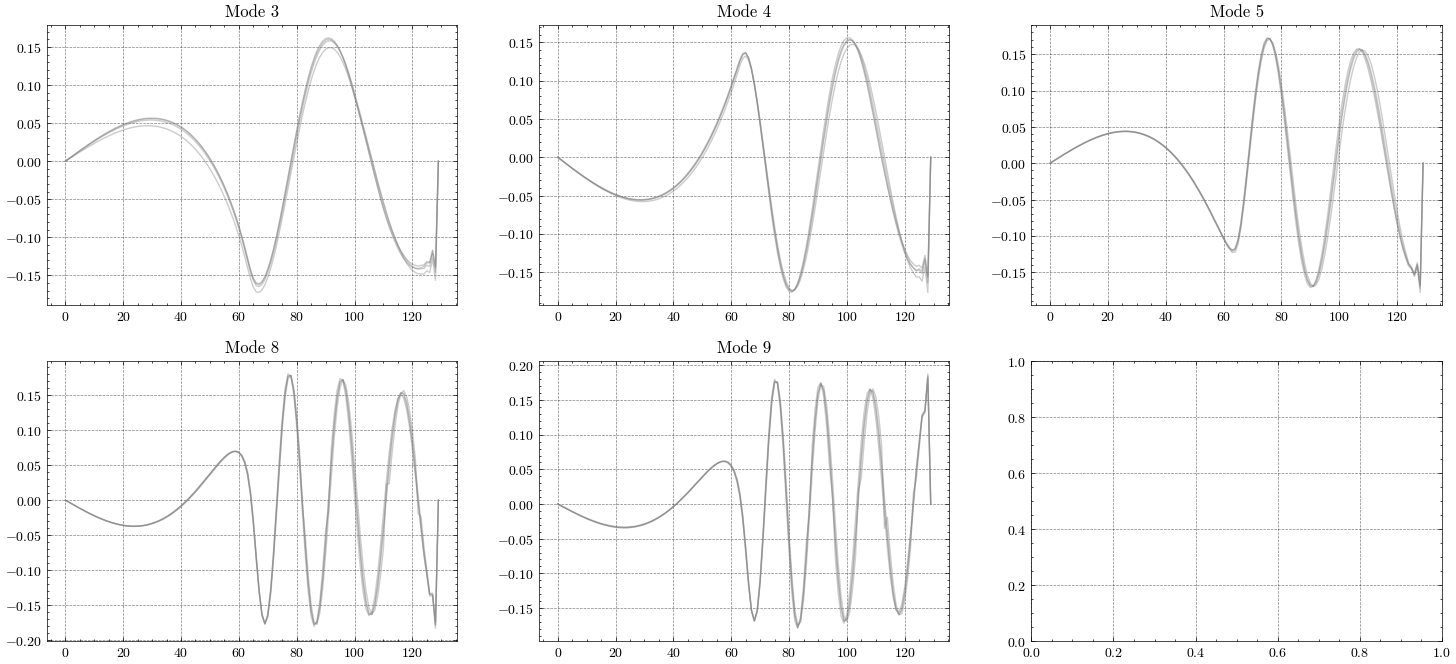

In [27]:
# plot the modes of Vr and Vbar for the selected anomalous points
n_modes_viz = 3
fig, axs = plt.subplots(2, n_modes_viz, figsize=(18, 8))
for i in range(n_modes_viz):
    for j in range(len(Vr_lst_sel)):
        axs[0, i].plot(Vr_lst_sel[j][:, i+3], label=names[j], color = 'grey', alpha=0.4)
        # axs[0, i].legend(fontsize='x-small')
    axs[0, i].set_title(f"Mode {i+3}")
    
for i in range(2):
    for j in range(len(Vbar_lst_sel)):
        axs[1, i].plot(Vbar_lst_sel[j][:, i], color='grey', alpha=0.4)
    axs[1, i].set_title(f"Mode {r + i}")

In [28]:
# # # make sure first component of all the basis vectors are positive for the global V_combined, if not, flip the sign
# # for col_ind in range(V_combined_global.shape[1]):
# #     if np.sign(V_combined_global[0, col_ind]) == -1:
# #         V_combined_global[:, col_ind] = -V_combined_global[:, col_ind]
    
# for i in range(len(V_combined_lst_stochastic)):
#     component_ind = 0
#     signs = np.sign(V_combined_lst_stochastic[i][component_ind, :])
    
#     non_zero_signs_ind = np.where(signs != 0)[0]
#     zero_signs_ind = np.where(signs == 0)[0]
    
#     print("Signs: ", signs)
#     for col_ind in non_zero_signs_ind:
#         V_combined_lst_stochastic[i][:, col_ind] = signs[col_ind] * V_combined_lst_stochastic[i][:, col_ind]
    
#     if zero_signs_ind.size != 0:
#         # find the index of maximum along the column
#         max_inds = np.argmax(V_combined_lst_stochastic[i][:, zero_signs_ind], axis=0)
#         max_signs = np.sign(V_combined_lst_stochastic[i][max_inds, zero_signs_ind])
        
#         for j in range(len(zero_signs_ind)):
#             V_combined_lst_stochastic[i][:, zero_signs_ind[j]] = max_signs[j] * V_combined_lst_stochastic[i][:, zero_signs_ind[j]]
    
#     print("Altered signs: ", np.sign(V_combined_lst_stochastic[i][0, :]))


# # Aligning the signs 
# for i in range(len(V_combined_lst_stochastic) - 1):
#     max_inds = np.argmax(V_combined_lst_stochastic[-1], axis=0) # max indexes for each column corresponding to the largest value in each column
#     for j in range(V_combined_lst_stochastic[i].shape[1]):
#         if np.sign(V_combined_lst_stochastic[i][max_inds[j], j]) != np.sign(V_combined_lst_stochastic[-1][max_inds[j], j]):
#             V_combined_lst_stochastic[i][:, j] = -V_combined_lst_stochastic[i][:, j]

In [29]:
# change the names too
names_sel = [names[i] for i in anomalous_idx_svm]
names_sel.append("Global")

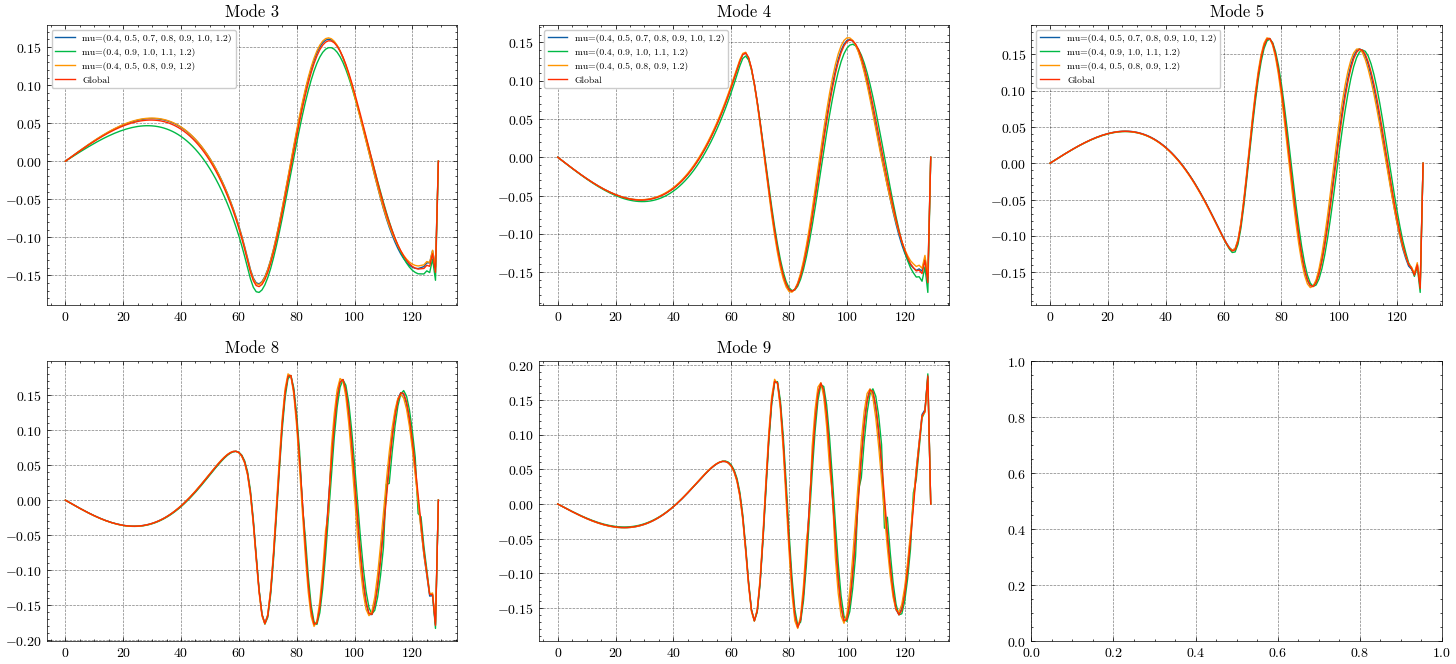

In [30]:
# plot the modes of the aligned signs modes
n_modes_viz = 3
fig, axs = plt.subplots(2, n_modes_viz, figsize=(18, 8))
for i in range(n_modes_viz):
    for j in range(len(V_combined_lst_stochastic)):
        axs[0, i].plot(V_combined_lst_stochastic[j][:, i+3], label=names_sel[j])
        axs[0, i].legend(fontsize='x-small')
    axs[0, i].set_title(f"Mode {i+3}")

for i in range(2):
    for j in range(len(V_combined_lst_stochastic)):
        axs[1, i].plot(V_combined_lst_stochastic[j][:, r + i], label=names_sel[j])
    axs[1, i].set_title(f"Mode {r + i}")

In [31]:
# import numpy as np
# import itertools
# from stiefel import *
# import importlib
# importlib.reload(stiefel)

# N_stiefel_samples = 1000

# # the global ROB as reference base point
# U0 = V_combined_lst_stochastic[-1]

# # number of models excluding the global ROB
# num_models = len(V_combined_lst_stochastic) - 1

# # rob has shape (num_models, n_points, n), where n_points is the number of points and n is the number of eigenvectors (order of samples)
# n_points = V_combined_lst_stochastic[0].shape[0]
# n = V_combined_lst_stochastic[0].shape[1]

# # get the tangent vectors deltas
# tau=0.00001
# Deltas = batch_stiefel_log(U0, V_combined_lst_stochastic, tau=tau, metric_alpha=0)

# # calculate condiiton number of the matrix H in the quadratic programming problem
# X = np.reshape(Deltas[:num_models, :, :], (num_models, -1))
# H = X @ X.T

# print("Condition number: ", np.linalg.cond(H))

# min_cond = np.inf
# best_combination = None

# for n_model in range(3, num_models+1):
#     for combination in itertools.combinations(range(num_models), n_model):
#         X = np.reshape(Deltas[list(combination), :, :], (n_model, -1))
#         H = X @ X.T
#         cond = np.linalg.cond(H)
#         if cond < min_cond:
#             min_cond = cond
#             best_combination = combination
            
#             # check full rank
#             rank = np.linalg.matrix_rank(H)
#             print(f"Rank: {rank}, Combintaion: {best_combination}, Condition Number: {cond} \n")
#             # if rank == n_model:
#             #     break
            

# print("Best combination: ", best_combination)
# print("Lowest condition number: ", min_cond)

In [32]:
assert(np.allclose(V_combined_lst_stochastic[0][:, :r], Vr_lst[anomalous_idx_svm[0]]))
assert(np.allclose(V_combined_lst_stochastic[0][:, r:], Vbar_lst[anomalous_idx_svm[0]]))

In [33]:
import numpy as np
import itertools
from stiefel import *
import importlib
importlib.reload(stiefel)

N_stiefel_samples = 1000

# the global ROB as reference base point
U0 = V_combined_lst_stochastic[-1]

# number of models excluding the global ROB
num_models = len(V_combined_lst_stochastic) - 1

# rob has shape (num_models, n_points, n), where n_points is the number of points and n is the number of eigenvectors (order of samples)
n_points = V_combined_lst_stochastic[0].shape[0]
n = V_combined_lst_stochastic[0].shape[1]

# get the tangent vectors deltas
tau=0.00001
Deltas = batch_stiefel_log(U0, V_combined_lst_stochastic, tau=tau, metric_alpha=0)

# calculate condiiton number of the matrix H in the quadratic programming problem
X = np.reshape(Deltas[:num_models, :, :], (num_models, -1))
H = X @ X.T

print("Condition number: ", np.linalg.cond(H))

Use algebraic Stiefel log, metric alpha =  0
Use algebraic Stiefel log, metric alpha =  0
Use algebraic Stiefel log, metric alpha =  0
Use algebraic Stiefel log, metric alpha =  0
Condition number:  9.81390254125755


In [34]:
# Generate the samples and split them into two arrays
stiefel_samples_Vbar, maxI = stiefel.gen_stiefel_samples(N_stiefel_samples, Vbar_lst_sel, tau=0.00001, metric_alpha=0.0000000000)

# # Align signs of stiefel samples with global ROB
# for i in range(len(stiefel_samples_Vbar)):
#     max_inds = np.argmax(V_combined_lst_stochastic[-1], axis=0) # max indexes for each column corresponding to the largest value in each column
#     for j in range(stiefel_samples_Vbar[i].shape[1]):
#         if np.sign(stiefel_samples_Vbar[i][max_inds[j], j]) != np.sign(V_combined_lst_stochastic[-1][max_inds[j], j]):
#             stiefel_samples_Vbar[i][:, j] = -stiefel_samples_Vbar[i][:, j]

Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
                                     CVXPY                                     
                                     v1.4.2                                    
(CVXPY) May 21 12:34:03 PM: Your problem has 3 variables, 2 constraints, and 0 parameters.
(CVXPY) May 21 12:34:03 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 12:34:03 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 12:34:03 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 21 12:34:03 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation

In [35]:
def gram_schmidt_rows(vectors):
    basis = []
    for v in vectors:
        w = v - sum( np.dot(v,b)*b  for b in basis )
        if (w > 1e-10).any():  
            basis.append(w/np.linalg.norm(w))
    return np.array(basis)

def gram_schmidt_columns(X):
    Q, R = np.linalg.qr(X)
    return Q

In [36]:
Vr_global = Vr_lst_sel[-1]

Vr_samples = []
Vbar_samples = []
V_combined_samples = []

for i in range(len(stiefel_samples_Vbar)):
    V_gramSchimdt = gram_schmidt_columns(np.concatenate([Vr_global, stiefel_samples_Vbar[i]], axis=1))
    
    # align the signs
    max_inds = np.argmax(V_combined_lst_stochastic[-1], axis=0) # max indexes for each column corresponding to the largest value in each column
    for j in range(V_gramSchimdt.shape[1]):
        if np.sign(V_gramSchimdt[max_inds[j], j]) != np.sign(V_combined_lst_stochastic[-1][max_inds[j], j]):
            V_gramSchimdt[:, j] = -V_gramSchimdt[:, j]
    
    V_combined_samples.append(V_gramSchimdt)
    
    Vr_sample = V_gramSchimdt[:, :r]
    Vbar_sample = V_gramSchimdt[:, r:r + q_trunc]
    
    Vr_samples.append(Vr_sample)
    Vbar_samples.append(Vbar_sample)    
    
Vr_samples = np.array(Vr_samples)
Vbar_samples = np.array(Vbar_samples)
V_combined_samples = np.array(V_combined_samples)

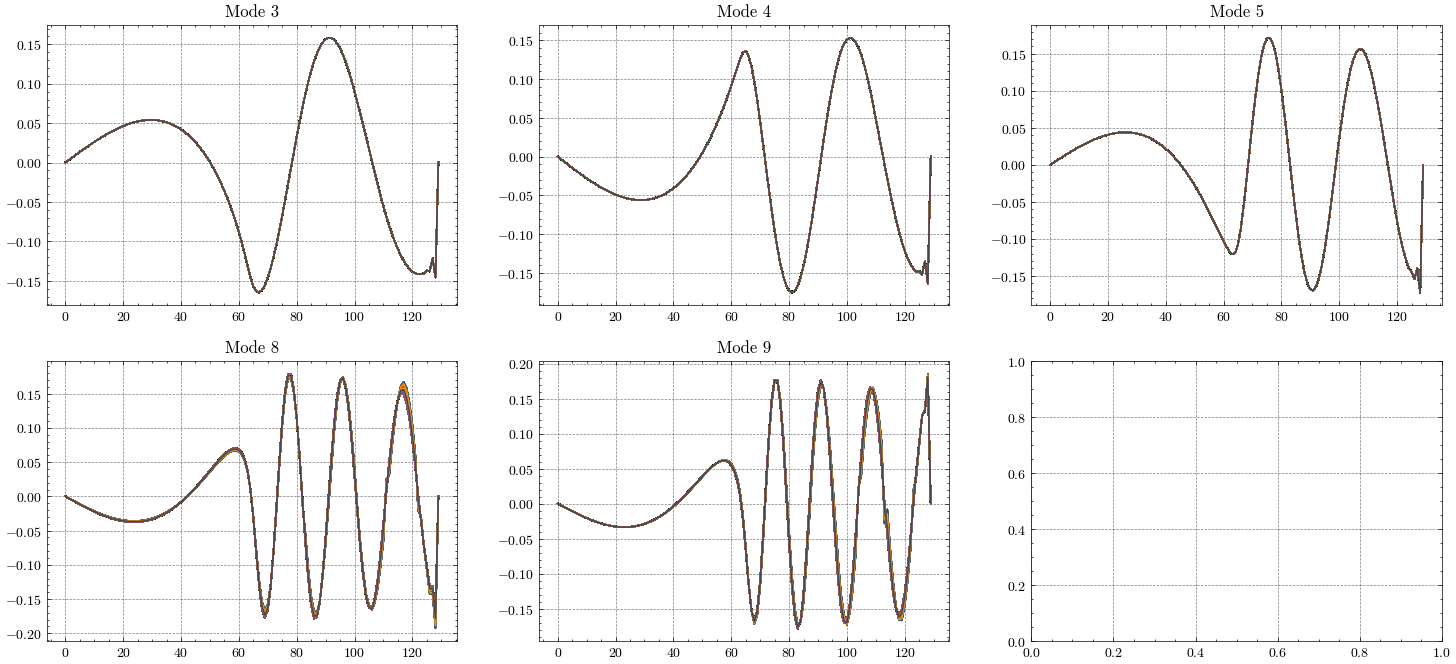

In [37]:
# plot the modes of the aligned signs modes
n_modes_viz = 3
fig, axs = plt.subplots(2, n_modes_viz, figsize=(18, 8))
for i in range(n_modes_viz):
    for j in range(len(V_combined_samples)):
        axs[0, i].plot(V_combined_samples[j][:, i+3])
        # axs[0, i].legend(fontsize='x-small')
    axs[0, i].set_title(f"Mode {i+3}")
    
for i in range(2):
    for j in range(len(V_combined_samples)):
        axs[1, i].plot(V_combined_samples[j][:, r + i])
    axs[1, i].set_title(f"Mode {r + i}")

In [38]:
V_frechet_mean = calc_frechet_mean_mat(V_combined_samples, V_combined_lst_stochastic[-1], eps=1e-2, tau=1e-3)

Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic Stiefel log, metric alpha =  0.0
Use algebraic

In [39]:
[rob.flatten()[:, None] for rob in V_combined_lst_stochastic][0].shape

(2600, 1)

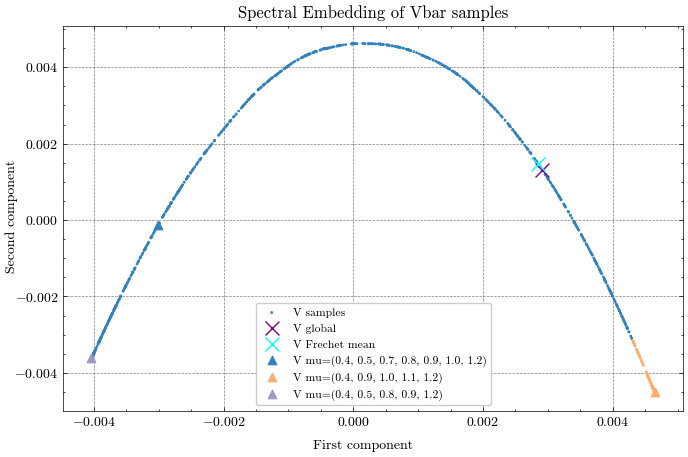

In [40]:
# plot spectral embedding of the generated stiefel sampels
flat_Vbar_arr = np.concatenate([rob.flatten()[:, None] for rob in Vbar_lst_sel], axis=1)
flat_V_combined_arr = np.concatenate([rob.flatten()[:, None] for rob in V_combined_lst_stochastic], axis=1)
flat_V_frechet_mean = V_frechet_mean[0].flatten()[:, None]

rob_V_combined_all = np.concatenate([rob.flatten()[:, None] for rob in V_combined_samples] + [flat_V_combined_arr] + [flat_V_frechet_mean], axis=1)

from sklearn.manifold import SpectralEmbedding
import matplotlib.pyplot as plt

colors = plt.cm.tab20c(np.linspace(0, 1, len(Vr_lst_sel)))

# Perform spectral embedding
embedder = SpectralEmbedding(n_components=2)
embedding_V_combined = embedder.fit_transform(rob_V_combined_all.T)

# Plot the embeddings
fig = plt.figure(figsize=(8, 5))
plt.subplot(1, 1, 1)
plt.scatter(embedding_V_combined[:N_stiefel_samples, 0], embedding_V_combined[:N_stiefel_samples, 1], color=colors[maxI], s=1, label='V samples')
plt.scatter(embedding_V_combined[-2, 0], embedding_V_combined[-2, 1], color='purple', label='V global', marker='x', s=100)
plt.scatter(embedding_V_combined[-1, 0], embedding_V_combined[-1, 1], color='cyan', label='V Frechet mean', marker='x', s=100)

for i in range(len(V_combined_lst_stochastic)-1):
    plt.scatter(embedding_V_combined[N_stiefel_samples+i, 0], embedding_V_combined[N_stiefel_samples+i, 1], color=colors[i], label=f"V {names_sel[i]}", marker='^')
    # print(f"Vbar {names_sel[-i-1]}")

plt.legend(fontsize='small')
plt.title('Spectral Embedding of Vbar samples')
    


# plt.xlabel('First component')
# plt.ylabel('Second component')

# Add common x and y labels
fig.text(0.5, 0.04, 'First component', ha='center', va='center')
fig.text(0.06, 0.5, 'Second component', ha='center', va='center', rotation='vertical')
plt.show()

In [81]:
# X_all_nominal_full = np.load("../examples/burgers/burgersFEniCSx_u_sol_all_RE1000.npy")

In [82]:
# # nominal s_rec_full

# Vr = Vr_lst[-1]
# Vbar = Vbar_lst[-1]


# coord = np.linspace(0, 1, N)
# # print("coord = ", coord.shape)
# IC = np.array([initial_condition(c) for c in coord])
# q0 = Vr.T @ (IC[:, None] - X_ref).flatten()

# T_end_full = 8
# time_domain_full = np.arange(0, T_end_full, dt)

# train_size = Shat_py.shape[1]

# multi_indices = generate_multi_indices_efficient(len(q0), p=p)


# modelform = config['params']['modelform']
# out_full = scipy.integrate.solve_ivp(
#             rhs,  # Integrate this function
#             [time_domain_full[0], time_domain_full[-1]],  # over this time interval
#             q0,  # from this initial condition
#             t_eval=time_domain_full,  # evaluated at these points
#             args=[operators, multi_indices, modelform, None],  # additional arguments to rhs
            
#         )

# s_hat_full = out_full.y
# poly_full = np.concatenate(polynomial_form(s_hat_full, p=p), axis=0)
# Xi = Xi_lst[-1] # the nominal Xi
# # print("Poly shape: ", poly_full.shape)

# s_rec_full_nominal = X_ref + Vr @ s_hat_full + Vbar @ Xi @ poly_full


# abs_error_full_nominal = np.abs(X_all_nominal_full[2].T - s_rec_full_nominal)
# relative_error_testing_window_nominal = np.linalg.norm(X_all_nominal_full[2].T[:, T_end_index:] - s_rec_full_nominal[:, T_end_index:], 'fro') / np.linalg.norm(X_all_nominal_full[2].T[:, T_end_index:], 'fro')
# relative_error_training_window_nominal = np.linalg.norm(X_all_nominal_full[2].T[:, :T_end_index] - s_rec_full_nominal[:, :T_end_index], 'fro') / np.linalg.norm(X_all_nominal_full[2].T[:, :T_end_index], 'fro')

In [83]:
operators_lst_sel = [operators_lst[i] for i in anomalous_idx_svm]
X_list_sel = [X_list[i] for i in anomalous_idx_svm]
Xi_lst_sel = [Xi_lst[i] for i in anomalous_idx_svm]

In [84]:
# import tqdm

# N_samples = 1000
# abs_error_full_lst = []
# relative_error_testing_window_lst = []
# relative_error_training_window_lst = []
# s_rec_full_lst = []

# mu_test = 0.98

# for i in tqdm.tqdm(range(N_samples)):
#     # # randomly choose 1 from stiefel_samples_Vr and 1 from stiefel_samples_Vbar
#     # idx_Vr = np.random.randint(0, N_stiefel_samples)
#     # idx_Vbar = np.random.randint(0, N_stiefel_samples)
    
#     # print(i)
    
#     operators = operators_lst_sel[maxI[i]]
    
#     X = X_list[anomalous_idx_svm[maxI[i]]]
#     X_ref = np.mean(X, axis=1)[:, None]
    
#     # Vr_sample = Vr_samples[i]
#     # Vbar_sample = Vbar_samples[i]
    
#     Vr_sample = Vr_lst_sel[maxI[i]]
#     Vbar_sample = Vbar_lst_sel[maxI[i]]

#     coord = np.linspace(0, 1, N)
#     # print("coord = ", coord.shape)
#     IC = np.array([initial_condition(mu_test, c) for c in coord])
#     q0 = Vr_sample.T @ (IC[:, None] - X_ref).flatten()
    
#     T_end_full = 8
#     time_domain_full = np.arange(0, T_end_full, dt)
    
#     train_size = Shat_py.shape[1]

#     multi_indices = generate_multi_indices_efficient(len(q0), p=p)
    
    
#     out_full = scipy.integrate.solve_ivp(
#                 rhs,  # Integrate this function
#                 [time_domain_full[0], time_domain_full[-1]],  # over this time interval
#                 q0,  # from this initial condition
#                 t_eval=time_domain_full,  # evaluated at these points
#                 args=[operators, config['params'], None, multi_indices],  # additional arguments to rhs
                
#             )
    
#     s_hat_full = out_full.y
#     poly_full = np.concatenate(polynomial_form(s_hat_full, p=p), axis=0)
#     # Xi = Xi_lst[-1] # the nominal Xi
#     Xi = Xi_lst_sel[maxI[i]]
#     # print("Poly shape: ", poly_full.shape)

#     s_rec_full = X_ref + Vr_sample @ s_hat_full + Vbar_sample @ Xi @ poly_full
    
#     try:
#         abs_error_full = np.abs(X_all_test.T - s_rec_full)
#         relative_error_testing_window = np.linalg.norm(X_all_test.T[:, T_end_index:] - s_rec_full[:, T_end_index:], 'fro') / np.linalg.norm(X_all_test.T[:, T_end_index:], 'fro')
#         relative_error_training_window = np.linalg.norm(X_all_test.T[:, :T_end_index] - s_rec_full[:, :T_end_index], 'fro') / np.linalg.norm(X_all_test.T[:, :T_end_index], 'fro')
        
#         abs_error_full_lst.append(abs_error_full)
#         relative_error_testing_window_lst.append(relative_error_testing_window)
#         relative_error_training_window_lst.append(relative_error_training_window)
#         s_rec_full_lst.append(s_rec_full)
        
#     except Exception as e:
#         print(e)
#         print("Error in iteration: ", i)
#         continue    

In [88]:
import tqdm

N_samples = 1000
abs_error_full_lst = []
relative_error_testing_window_lst = []
relative_error_training_window_lst = []
s_rec_full_lst = []

mu_test = 0.98

for i in tqdm.tqdm(range(N_samples)):
    
    operators = operators_lst_sel[maxI[i]]
    # operators = operators_lst_sel[i]
    
    X = X_list_sel[maxI[i]]
    X_ref = np.mean(X, axis=1)[:, None]
    # X_centered = X - X_ref
    
    Vr = Vr_lst_sel[maxI[i]]
    Vbar = Vbar_lst_sel[maxI[i]]
    
    # Vr = Vr_lst[anomalous_idx_svm[maxI[i]]]
    # Vbar = Vbar_lst[anomalous_idx_svm[maxI[i]]]
    
    # Vr = V_combined_lst_stochastic[maxI[i]][:, :r]
    # Vbar = V_combined_lst_stochastic[maxI[i]][:, r:r+q_trunc]
    
    # Vr = Vr_samples[i]
    # Vbar = Vbar_samples[i]
    
    # Vr = Vr_lst_sel[-1]
    # Vbar = Vbar_lst_sel[-1]
    
    coord = np.linspace(0, 1, N)
    # print("coord = ", coord.shape)
    IC = np.array([initial_condition(mu_test, c) for c in coord])
    q0 = Vr.T @ (IC[:, None] - X_ref).flatten()
    
    T_end_full = 8
    time_domain_full = np.arange(0, T_end_full, dt)
    
    train_size = Shat_py.shape[1]

    multi_indices = generate_multi_indices_efficient(len(q0), p=p)
    
    out_full = scipy.integrate.solve_ivp(
                rhs,  # Integrate this function
                [time_domain_full[0], time_domain_full[-1]],  # over this time interval
                q0,  # from this initial condition
                t_eval=time_domain_full,  # evaluated at these points
                args=[operators, config['params'], None, multi_indices],  # additional arguments to rhs
            )
    
    s_hat_full = out_full.y
    poly_full = np.concatenate(polynomial_form(s_hat_full, p=p), axis=0)

    
    Xi = Xi_lst[anomalous_idx_svm[maxI[i]]]
    # Xi = Xi_lst_sel[i]
    

    s_rec_full = X_ref + Vr @ s_hat_full + Vbar @ Xi @ poly_full
    
    
    abs_error_full = np.abs(X_all_test.T - s_rec_full)
    relative_error_testing_window = np.linalg.norm(X_all_test.T[:, T_end_index:] - s_rec_full[:, T_end_index:], 'fro') / np.linalg.norm(X_all_test.T[:, T_end_index:], 'fro')
    relative_error_training_window = np.linalg.norm(X_all_test.T[:, :T_end_index] - s_rec_full[:, :T_end_index], 'fro') / np.linalg.norm(X_all_test.T[:, :T_end_index], 'fro')
    
    abs_error_full_lst.append(abs_error_full)
    relative_error_testing_window_lst.append(relative_error_testing_window)
    relative_error_training_window_lst.append(relative_error_training_window)
    s_rec_full_lst.append(s_rec_full)
    
    

100%|██████████| 1000/1000 [00:18<00:00, 53.00it/s]


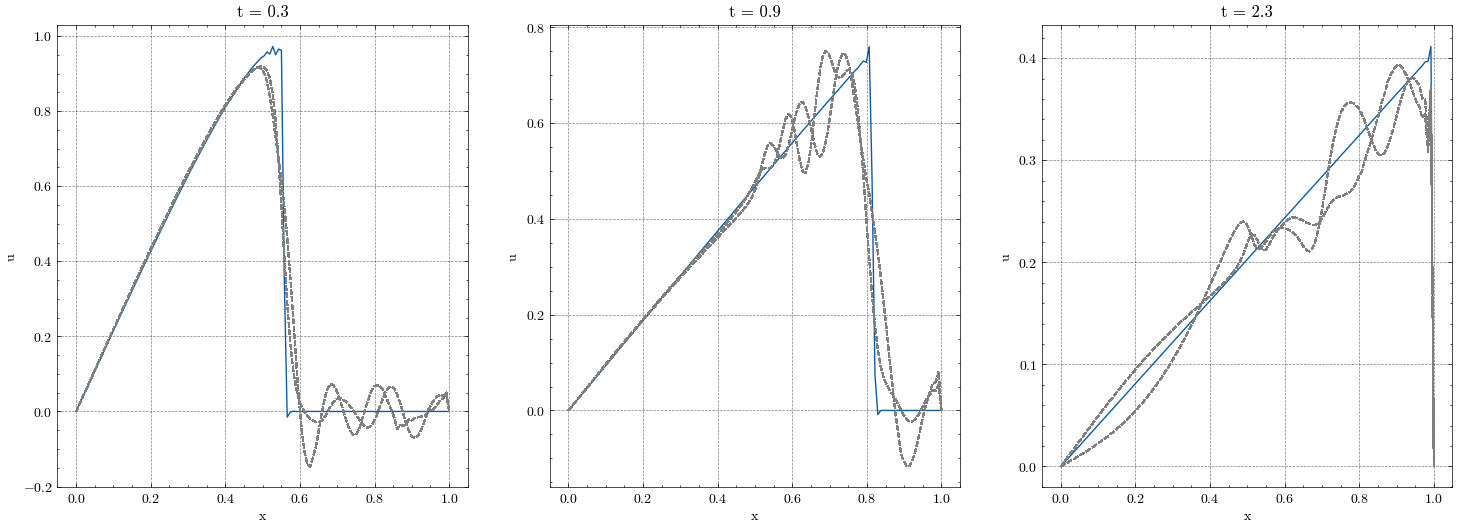

In [90]:
# plot all the samples
times = [0.3, 0.9, 2.3]

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, t in enumerate(times):
    ax = axs[i]
    t_index = int(t / dt)  # Ensure dt is defined and properly calculated

    # Main plot
    x_values = np.linspace(0, 1, s_rec_full_lst[0].shape[0])
    
    ax.plot(x_values, X_all_test.T[:, t_index], label="True", linestyle='-', alpha=1)
    for j in range(len(s_rec_full_lst)):
        ax.plot(x_values, s_rec_full_lst[j][:, t_index], label=f"Sample {j}", linestyle='--', alpha=0.5, color='grey')
    
    ax.set_title(f"t = {t}")
    ax.set_xlabel('x')
    ax.set_ylabel('u')
    # ax.legend(loc="upper left")

In [91]:
# mean relative error across the testing window
mean_relative_error_testing = np.mean(relative_error_testing_window_lst)
std_relative_error_testing = np.std(relative_error_testing_window_lst)
# coeff_var = std_relative_error_testing / mean_relative_error_testing
print(f"Mean relative error: {mean_relative_error_testing:.4%}")
print(f"Std relative error: {std_relative_error_testing:.4%}")
# print(f"Coefficient of variation: {coeff_var:.4%}")

Mean relative error: 45.0814%
Std relative error: 4.0102%


In [92]:
# coefficient of variation of s_rec_full
# coeff_var_s_rec_full = np.std(s_rec_full_lst, axis=0) / (np.mean(s_rec_full_lst, axis=0))
std_s_rec_full = np.std(s_rec_full_lst, axis=0)
std_s_rec_full_testing = std_s_rec_full[T_end_index:]
std_s_rec_full_training = std_s_rec_full[:T_end_index]

In [93]:
#  mean reconstruction
mean_s_rec_full = np.mean(s_rec_full_lst, axis=0)
mean_s_rec_full_testing = mean_s_rec_full[T_end_index:]
mean_s_rec_full_training = mean_s_rec_full[:T_end_index]

In [94]:
# calculate 95% confidence interval
confidence_interval = 1.96 * std_s_rec_full

X =  (8000, 130)
Y =  (8000, 130)
s_ref_all[i] =  (0, 8000)


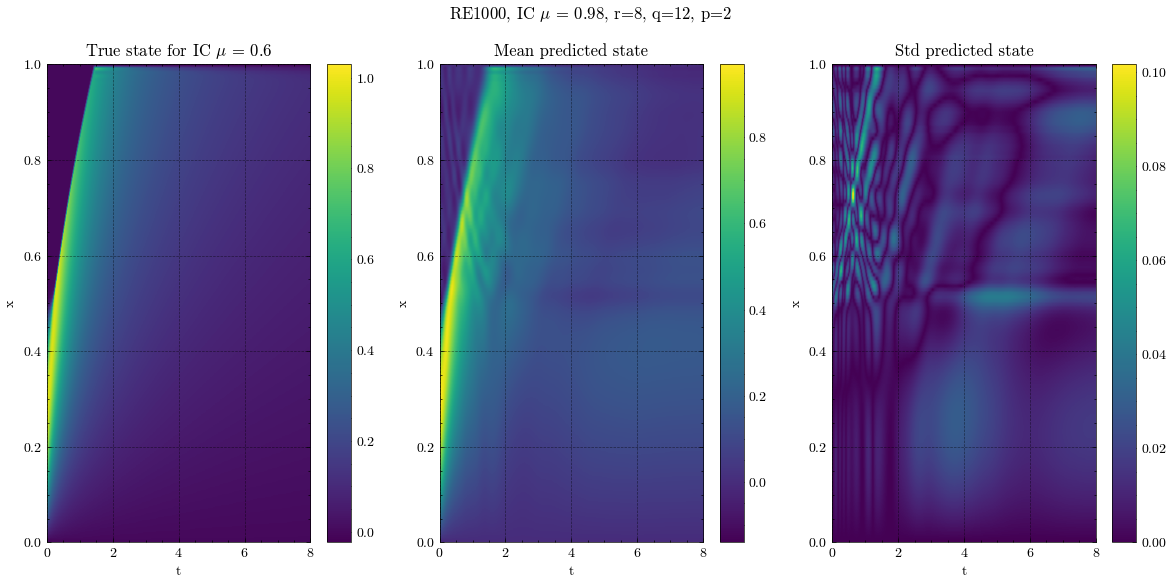

In [95]:
# plot the results side by side
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming s_ref_all is a list of 2D numpy arrays
for i in range(1):
    fig, axs = plt.subplots(1, 3, figsize=(12, 6))
    XX, YY = np.meshgrid(np.linspace(0.0, T_end_full, int(mean_s_rec_full.shape[0])), np.linspace(0.0, 1.0, mean_s_rec_full.shape[1]))
    print("X = ", XX.shape)
    print("Y = ", YY.shape)
    print("s_ref_all[i] = ", mean_s_rec_full_testing.shape)
    # s = ax.plot_surface(X, Y, s_ref_all[i].reshape(N, int(K+1)), cmap='viridis')
    
    c0 = axs[0].imshow(X_all_test.T, extent=[np.min(XX), np.max(XX), np.min(YY), np.max(YY)], origin='lower', aspect='auto')
    fig.colorbar(c0, ax=axs[0], orientation='vertical')
    axs[0].set_xlabel('t')
    axs[0].set_ylabel('x')
    axs[0].set_title(f'True state for IC $\mu$ = {mus[2]}')
    
    c1 = axs[1].imshow(mean_s_rec_full, extent=[np.min(XX), np.max(XX), np.min(YY), np.max(YY)], origin='lower', aspect='auto')
    fig.colorbar(c1, ax=axs[1], orientation='vertical')
    axs[1].set_xlabel('t')
    axs[1].set_ylabel('x')
    axs[1].set_title(f'Mean predicted state')
    
    c2 = axs[2].imshow(std_s_rec_full, extent=[np.min(XX), np.max(XX), np.min(YY), np.max(YY)], origin='lower', aspect='auto')
    # c2 = axs[1].imshow(s_rec_all[i].reshape(N, int(K+1)), extent=[np.min(X), np.max(X), np.min(Y), np.max(Y)], origin='lower', aspect='auto')
    fig.colorbar(c2, ax=axs[2], orientation='vertical')
    axs[2].set_xlabel('t')
    axs[2].set_ylabel('x')
    axs[2].set_title(f'Std predicted state')
    
    
    # fig.colorbar(c1, ax=axs, orientation='horizontal', fraction=0.05, pad=0.05)
    # fig.colorbar(c2, ax=axs, orientation='horizontal', fraction=0.05, pad=0.05)
    plt.suptitle(f"RE1000, IC $\mu$ = 0.98, r={r}, q={q_trunc}, p={p}")
    plt.tight_layout()
    plt.show()

In [96]:
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib.cm import ScalarMappable
# from matplotlib.colors import Normalize


# # plot 95% confidence interval of the solution
# fig = plt.figure(figsize=(6, 6))
# # ax = fig.add_subplot(111, projection='3d')
# ax = fig.add_subplot(111)
# upper_bound = mean_s_rec_full + confidence_interval
# lower_bound = mean_s_rec_full - confidence_interval

# XX, YY = np.meshgrid(np.linspace(0.0, T_end_full, int(s_rec_full_nominal.T.shape[0])), np.linspace(0.0, 1.0, s_rec_full_nominal.T.shape[1]))

# # surf = ax.plot_surface(XX, YY, s_rec_full_nominal, cmap='viridis', alpha=0.7)

# contour = ax.imshow(s_rec_full_nominal, extent=[np.min(XX), np.max(XX), np.min(YY), np.max(YY)], origin='lower', aspect='auto')
# cbar = fig.colorbar(ScalarMappable(norm=Normalize(vmin=np.min(s_rec_full_nominal.T), vmax=np.max(s_rec_full_nominal.T)), cmap='viridis'), ax=ax, orientation='vertical', fraction=0.05, pad=0.05)
# cbar.set_label('u, Velocity')


# # draw vertical plane at t=0.125, 0.375, 1,75
# times = [0.3, 0.9, 2.3]
# for t in times:
#     ax.plot([t, t], [0, 1], [0, 0], color='red', linestyle='--')


# ax.set_xlabel('t')
# ax.set_ylabel('x')
# # ax.set_zlabel('u')
# ax.set_title(f'RE1000, nominal model solution for IC $\mu$ = {mus[2]}, r={r}, q={q_trunc}, p={p}')


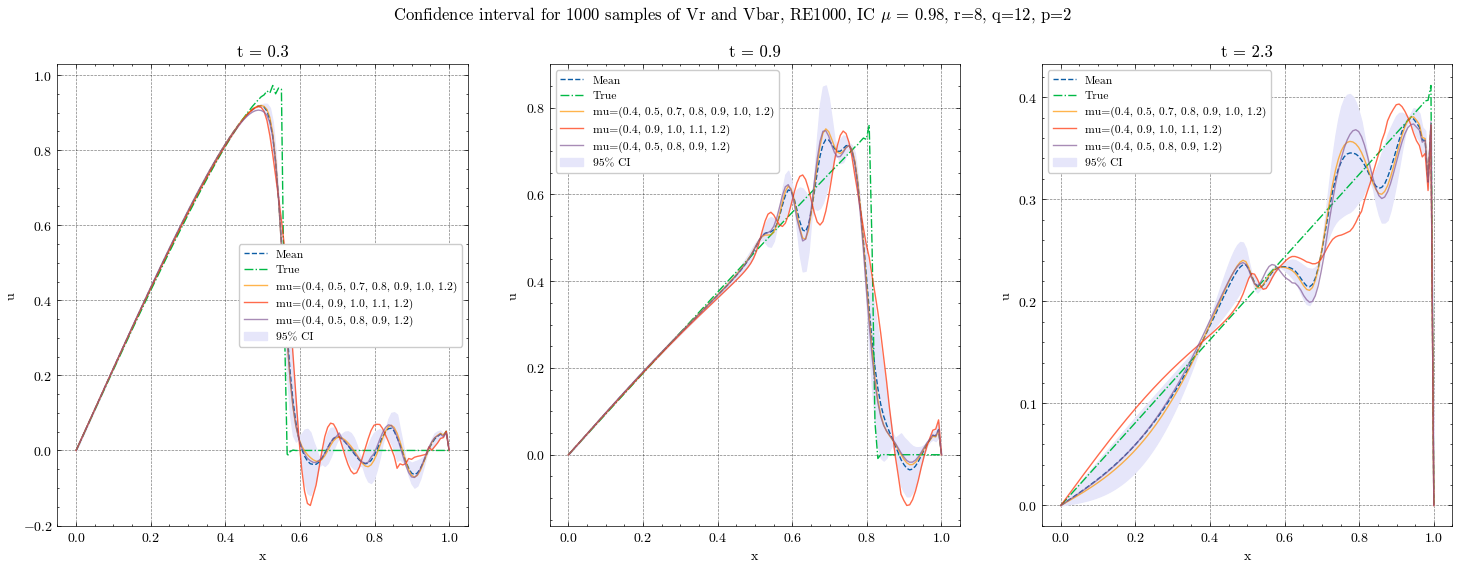

In [97]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np

# Example setup (you'll need to define mean_s_rec_full, lower_bound, and upper_bound appropriately)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

upper_bound = mean_s_rec_full + confidence_interval
lower_bound = mean_s_rec_full - confidence_interval

s_rec_full_lst_operators_sel = [s_rec_full_lst_operators[i] for i in anomalous_idx_svm]

for i, t in enumerate(times):
    ax = axs[i]
    t_index = int(t / dt)  # Ensure dt is defined and properly calculated

    # Main plot
    x_values = np.linspace(0, 1, mean_s_rec_full.shape[0])
    mean_line = mean_s_rec_full[:, t_index]
    # nominal_line = s_rec_full_nominal[:, t_index]
    true_line = X_all_test.T[:, t_index]
    lower_line = lower_bound[:, t_index]
    upper_line = upper_bound[:, t_index]
    
    model_lines = [s_rec_full_lst_operators_sel[j][:, t_index] for j in range(len(s_rec_full_lst_operators_sel))]
    
    ax.plot(x_values, mean_line, label='Mean', linestyle="--")
    ax.plot(x_values, true_line, label='True', linestyle="-.")
    for j in range(len(s_rec_full_lst_operators_sel)):
        ax.plot(x_values, model_lines[j], label=names_sel[j], linestyle="-", alpha=0.7)
    # ax.plot(x_values, nominal_line, label='Nominal', linestyle=":")
    ax.fill_between(x_values, lower_line, upper_line, alpha=1, label='95% CI', color='lavender')
    ax.set_title(f"t = {t}")
    ax.set_xlabel('x')
    ax.set_ylabel('u')
    ax.legend(loc="best", fontsize='small')

    # # Create an inset axis
    # axins = inset_axes(ax, width="25%", height="25%", loc='center right')

    # # Plot the same data on the inset
    # axins.plot(x_values, mean_line, linestyle="--")
    # axins.plot(x_values, true_line, linestyle="-.")
    # axins.plot(x_values, nominal_line, linestyle=":")
    
    # if np.allclose(lower_line, upper_line):
    #     print("Lower and upper bounds are the same")
    #     axins.plot(x_values, lower_line, color='lavender')
    # else:
    #     print("Lower and upper bounds are different")
    #     axins.fill_between(x_values, lower_line, upper_line, color='lavender', alpha=1)

    # # Zoom-in range for the x-axis
    # focus_x_min, focus_x_max = 0.8, 0.81
    # axins.set_xlim(focus_x_min, focus_x_max)
    # axins.set_ylim(np.min(lower_line), np.max(upper_line))

    # # Dynamically determine the y-range based on the focus area
    # mask = (x_values >= focus_x_min) & (x_values <= focus_x_max)
    # focus_y_min = min(np.min(lower_line[mask]), np.min(mean_line[mask]))
    # focus_y_max = max(np.max(upper_line[mask]), np.max(mean_line[mask]))
    # y_margin = (focus_y_max - focus_y_min) * 0.1  # Adjust margin
    # axins.set_ylim(focus_y_min - y_margin, focus_y_max + y_margin)

    # # Optionally remove tick labels to declutter
    # axins.xaxis.set_tick_params(labelbottom=True)
    # axins.yaxis.set_tick_params(labelleft=True)

# plt.tight_layout()
plt.suptitle(f"Confidence interval for 1000 samples of Vr and Vbar, RE1000, IC $\mu$ = 0.98, r={r}, q={q_trunc}, p={p}")
plt.show()
